<a href="https://colab.research.google.com/github/FGalvao77/Prevendo-valor-de-acoes---Investimentos-Itau-SA-ITSA4.SA-/blob/main/Prevendo_valor_de_a%C3%A7%C3%B5es_Investimentos_Ita%C3%BA_SA_(ITSA4_SA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prevendo valor de ações - `Investimentos Itaú/SA (ITSA4.SA)`**

**Introdução**

Criar um modelo de predição para estimar valores de ações. Nesse caso, as ações do [**ITSA4.SA**](https://finance.yahoo.com/quote/ITSA4.SA?p=ITSA4.SA&.tsrc=fin-srch), utilizaremos a biblioteca  [`yfinance`](https://pypi.org/project/yfinance/) para carregar os dados diretamente do site [**Yahoo! Finance**](https://finance.yahoo.com/).

In [1]:
# biblioteca para ignorar mensagens de alerta
import warnings
warnings.filterwarnings('ignore')

In [2]:
# instalando a biblioteca 
!pip install yfinance

In [3]:
# importando a biblioteca para baixar os dados diretamente do site https://finance.yahoo.com/
import yfinance as yf

In [4]:
# importando o conjunto de dados (https://finance.yahoo.com/quote/ITSA4.SA?p=ITSA4.SA&.tsrc=fin-srch)
data_ITAU = 'ITSA4.SA' # Itaúsa - Investimentos Itaú/SA

In [5]:
# instanciando o conjunto de dados no objeto "df"
df_ITAU = yf.download(data_ITAU).reset_index()

[*********************100%***********************]  1 of 1 completed


In [6]:
# visualizando o tipo do objeto criado
type(df_ITAU)

pandas.core.frame.DataFrame

In [7]:
# visualizando a data inicial e final
print(
    f'Data inicial: {df_ITAU.Date[:1]}',
    f'Data final: {df_ITAU.Date[-1:]}',
    sep='\n\n'
)

Data inicial: 0   2000-01-03
Name: Date, dtype: datetime64[ns]

Data final: 5532   2022-01-07
Name: Date, dtype: datetime64[ns]


In [8]:
# visualizando as 5 primeiras linhas da base de dados
df_ITAU.head().round(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.97,1.09,0.96,1.03,0.56,10799362
1,2000-01-04,1.00,1.00,0.93,0.93,0.50,12675326
2,2000-01-05,0.94,1.01,0.90,1.01,0.55,9621184
3,2000-01-06,1.01,1.03,1.00,1.03,0.55,24240133
4,2000-01-07,1.04,1.05,1.01,1.02,0.55,11776899


In [9]:
# visualizando as 5 últimas linhas da base de dados
df_ITAU.tail().round(2)

,Date,Open,High,Low,Close,Adj Close,Volume
5528,2022-01-03,9.02,9.19,8.92,9.02,9.02,28542600
5529,2022-01-04,9.03,9.17,8.97,9.09,9.09,38831200
5530,2022-01-05,9.05,9.11,8.92,9.00,9.00,24574000
5531,2022-01-06,8.98,9.14,8.94,9.07,9.07,25383800
5532,2022-01-07,9.07,9.19,9.01,9.18,9.18,21446300


In [10]:
# informações gerais do conjunto de dados
df_ITAU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5533 non-null   datetime64[ns]
 1   Open       5533 non-null   float64       
 2   High       5533 non-null   float64       
 3   Low        5533 non-null   float64       
 4   Close      5533 non-null   float64       
 5   Adj Close  5533 non-null   float64       
 6   Volume     5533 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 302.7 KB


In [11]:
# instâncias únicas em cada atributo
df_ITAU.nunique()

Date         5533
Open         2932
High         2927
Low          2957
Close        2903
Adj Close    3698
Volume       5254
dtype: int64

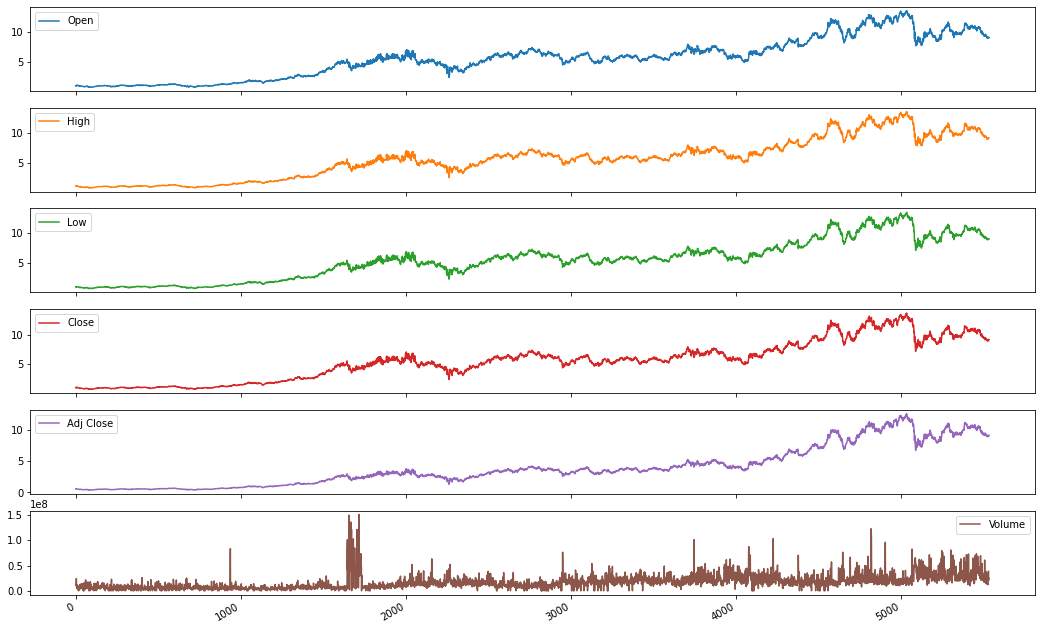

In [12]:
# instanciando as colunas de interesse
feats = (df_ITAU.columns[1:])

# plotando gráfico da série temporal
df_ITAU[feats].plot(subplots=True, figsize=(18,12));

In [13]:
# bibliotecas para visualização gráfica
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

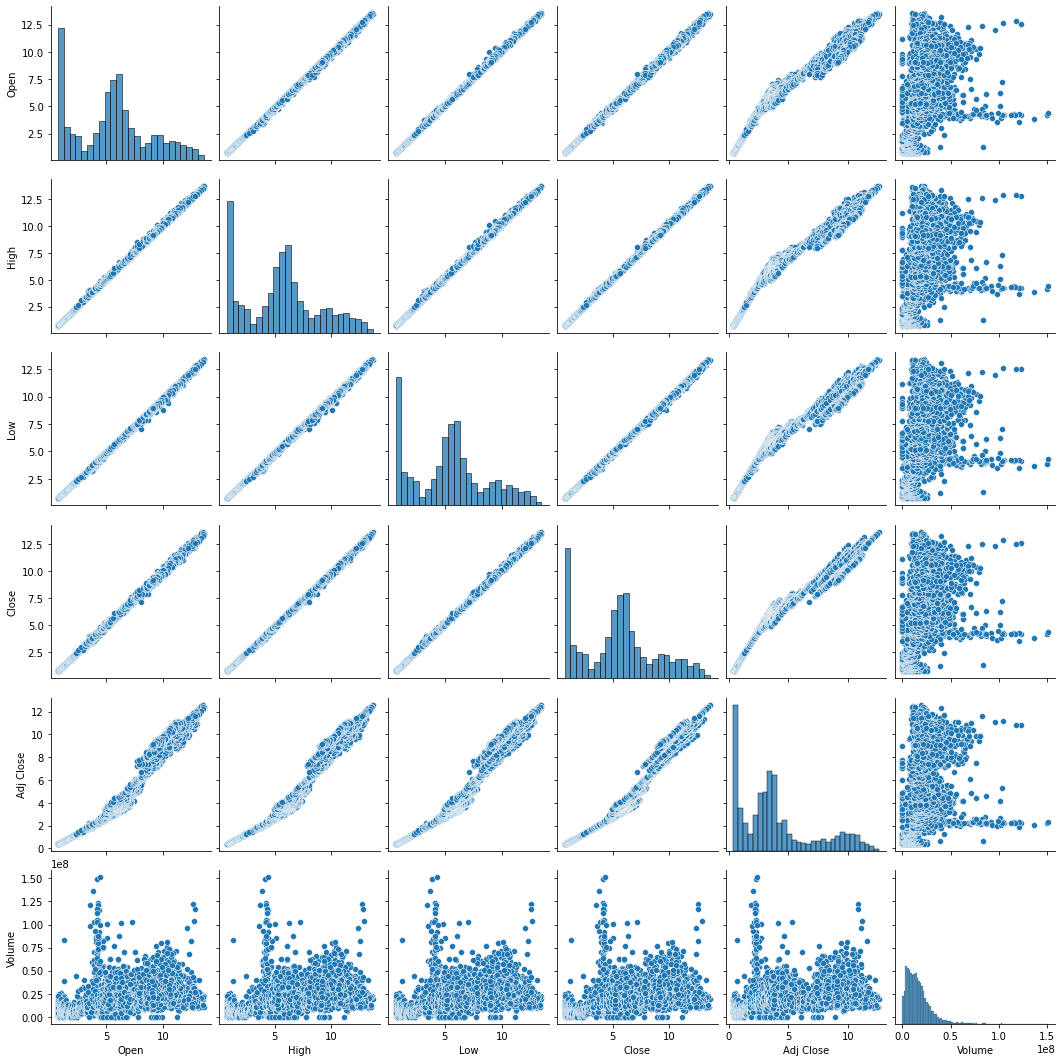

In [14]:
# plotando diversos gráficos dos dados dos atributos
sns.pairplot(df_ITAU);

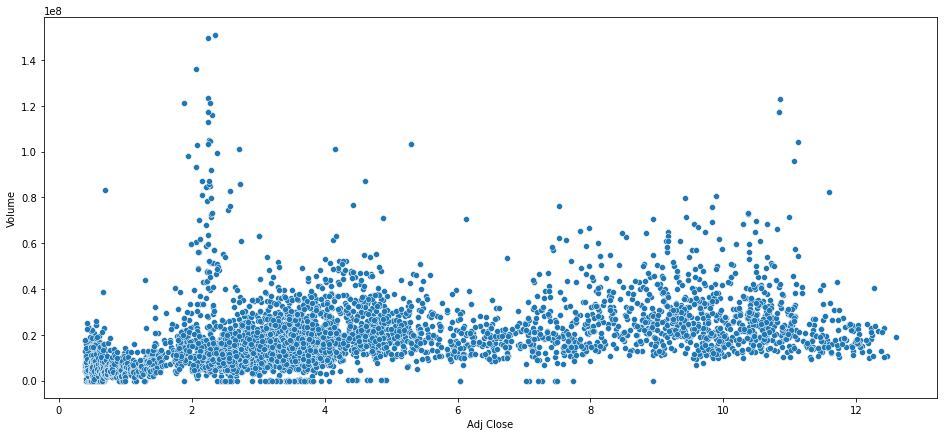

In [15]:
# gráfico de dispersão - "Adj Close" VS "Volume"
plt.figure(figsize=(16,7))
sns.scatterplot(data=df_ITAU, 
                x='Adj Close',
                y='Volume');

In [16]:
# correlação entre as variáveis
df_ITAU.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999759,0.999738,0.999472,0.968781,0.454390
High,0.999759,1.000000,0.999703,0.999764,0.969004,0.458995
Low,0.999738,0.999703,1.000000,0.999759,0.969122,0.450328
Close,0.999472,0.999764,0.999759,1.000000,0.968991,0.454610
Adj Close,0.968781,0.969004,0.969122,0.968991,1.000000,0.454779
Volume,0.454390,0.458995,0.450328,0.454610,0.454779,1.000000


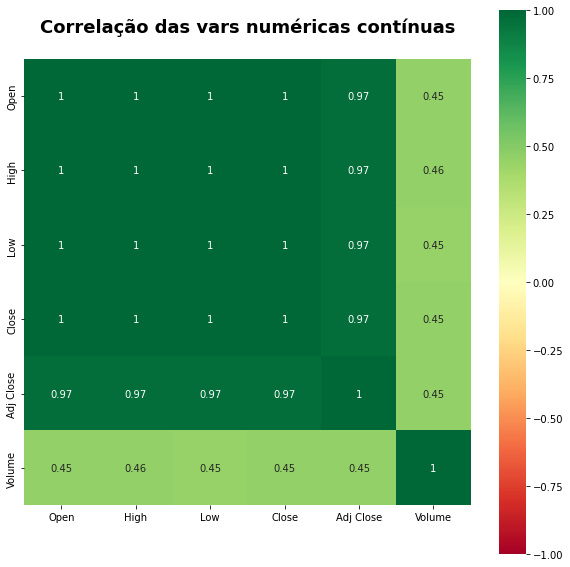

In [17]:
# gráfico de calor da correlação das variáveis numéricas
plt.figure(figsize=(10,10))

sns.heatmap(df_ITAU.corr(), cmap='RdYlGn', vmin=-1.0, 
            annot=True, vmax=1.0, square=True)
plt.title('Correlação das vars numéricas contínuas\n', 
          {'fontsize': 18,'fontweight': 'bold'});

In [18]:
# realizando um ponto de corte da correlação entre as variáveis somente maior e/ou igual a 0.5
vars_num_corr = df_ITAU.corr()['Adj Close'][:-1]
important_feats = vars_num_corr[abs(vars_num_corr) >= 0.5].sort_values(ascending=False)

print(f'Há {len(important_feats)} atributos com forte correlação com a variável alvo (Adj Close). \nSegue:')
important_feats

Há 5 atributos com forte correlação com a variável alvo (Adj Close). 
Segue:


Adj Close    1.000000
Low          0.969122
High         0.969004
Close        0.968991
Open         0.968781
Name: Adj Close, dtype: float64

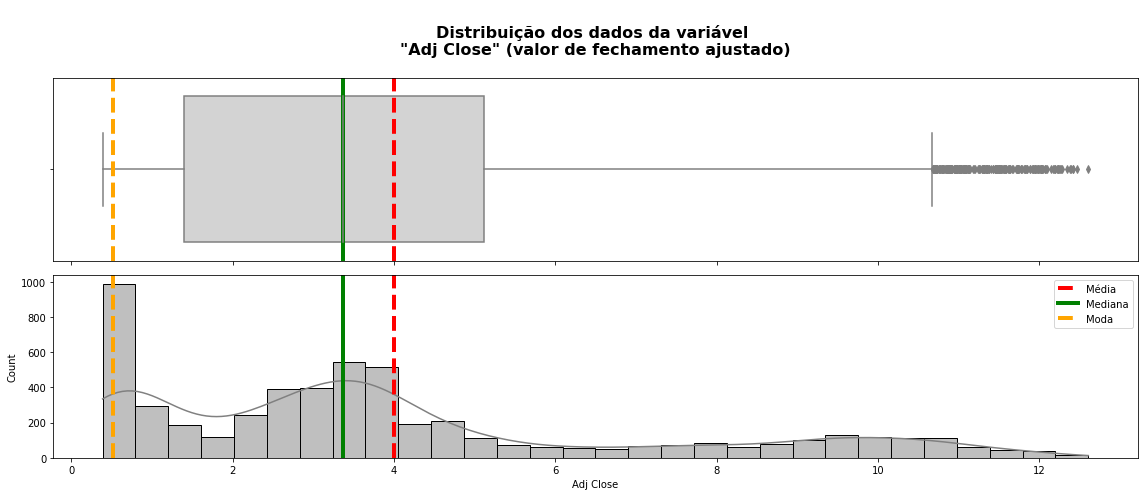

In [19]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "Adj Close" (valor de fechamento ajustado)
mean = df_ITAU['Adj Close'].mean()
median = df_ITAU['Adj Close'].median()
mode = df_ITAU['Adj Close'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(16,7))

sns.boxplot(data=df_ITAU, x='Adj Close', ax=ax_box, color='lightgray')
ax_box.axvline(mean, color='red', linestyle='--', linewidth=4)
ax_box.axvline(median, color='green', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='orange', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável \n"Adj Close" (valor de fechamento ajustado)\n',
                 {'fontsize': 16,'fontweight': 'bold'})

sns.histplot(data=df_ITAU, x='Adj Close', ax=ax_hist, kde=True, color='gray')
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='orange', linestyle='--', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

In [20]:
# instanciando os atributos "Date" e "Adj Close" na variável "df_close"
df_close_date = df_ITAU[['Date', 'Adj Close']]

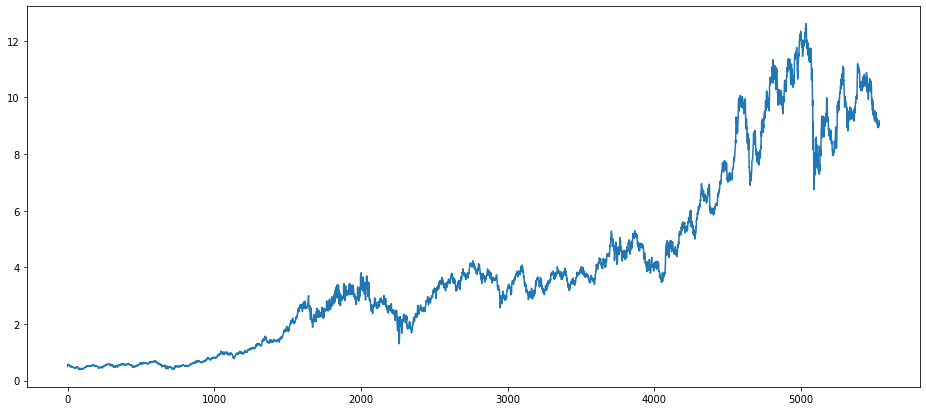

In [21]:
# gráfico de linha da série temporal
df_close_date['Adj Close'].plot(secondary_y=data_ITAU, figsize=(16,7));

In [22]:
# criando novos atributos para "Adj Close" (fechamento ajustado)
df_ITAU['5-day moving average'] = df_ITAU['Adj Close'].rolling(5).mean()      # média móvel de 5 dias
df_ITAU['15-day moving average'] = df_ITAU['Adj Close'].rolling(15).mean()    # média móvel de 15 dias
df_ITAU['45-day moving average'] = df_ITAU['Adj Close'].rolling(45).mean()    # média móvel de 45 dias

In [23]:
# visualizando os atributos criados
df_ITAU[['5-day moving average', '15-day moving average', '45-day moving average']]

,5-day moving average,15-day moving average,45-day moving average
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.541903,NaN,NaN
...,...,...,...
5528,9.030000,9.071435,9.318435
5529,9.030000,9.063077,9.302327
5530,9.014000,9.057587,9.285255
5531,9.022000,9.052095,9.274300


In [24]:
# contabilizando valores nulos presente na base de dados
df_ITAU.isnull().sum()

Date                      0
Open                      0
High                      0
Low                       0
Close                     0
Adj Close                 0
Volume                    0
5-day moving average      4
15-day moving average    14
45-day moving average    44
dtype: int64

In [25]:
# ajustando o valor de fechamento para o dia posterior
df_ITAU['Adj Close'] = df_ITAU['Adj Close'].shift(-1)

In [26]:
# visualizando a base da dados
df_ITAU

,Date,Open,High,Low,Close,Adj Close,Volume,5-day moving average,15-day moving average,45-day moving average
0,2000-01-03,0.969856,1.089143,0.964670,1.032093,0.503316,10799362,NaN,NaN,NaN
1,2000-01-04,0.995788,0.995788,0.933551,0.933551,0.545259,12675326,NaN,NaN,NaN
2,2000-01-05,0.938738,1.011347,0.902433,1.011347,0.553647,9621184,NaN,NaN,NaN
3,2000-01-06,1.006161,1.032093,1.000974,1.026906,0.550851,24240133,NaN,NaN,NaN
4,2000-01-07,1.037279,1.052838,1.011347,1.021720,0.570425,11776899,0.541903,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5528,2022-01-03,9.020000,9.190000,8.920000,9.020000,9.090000,28542600,9.030000,9.071435,9.318435
5529,2022-01-04,9.030000,9.170000,8.970000,9.090000,9.000000,38831200,9.030000,9.063077,9.302327
5530,2022-01-05,9.050000,9.110000,8.920000,9.000000,9.070000,24574000,9.014000,9.057587,9.285255
5531,2022-01-06,8.980000,9.140000,8.940000,9.070000,9.180000,25383800,9.022000,9.052095,9.274300


In [27]:
# percentual de dados nulos/ausentes em relação ao total de dados da base
((df_ITAU.isnull().sum() / len(df_ITAU)) * 100).round(2)

Date                     0.00
Open                     0.00
High                     0.00
Low                      0.00
Close                    0.00
Adj Close                0.02
Volume                   0.00
5-day moving average     0.07
15-day moving average    0.25
45-day moving average    0.80
dtype: float64

In [28]:
# removendo valores nulos/ausentes da base de dados
df_ITAU.dropna(inplace=True)

# verificando se valores nulos/ausentes foram removidos
df_ITAU.isnull().sum().any()    # retorno é uma resposta boleana | True = verdadeiro & False = falso

False

In [29]:
# instanciando os atributos "Date", "Adj Close", "5-day moving average", "15-day moving average" 
# e "45-day moving average" na variável "df_close2"
df_close2 = df_ITAU[['Date', 'Adj Close', '5-day moving average', 
                     '15-day moving average', '45-day moving average']]

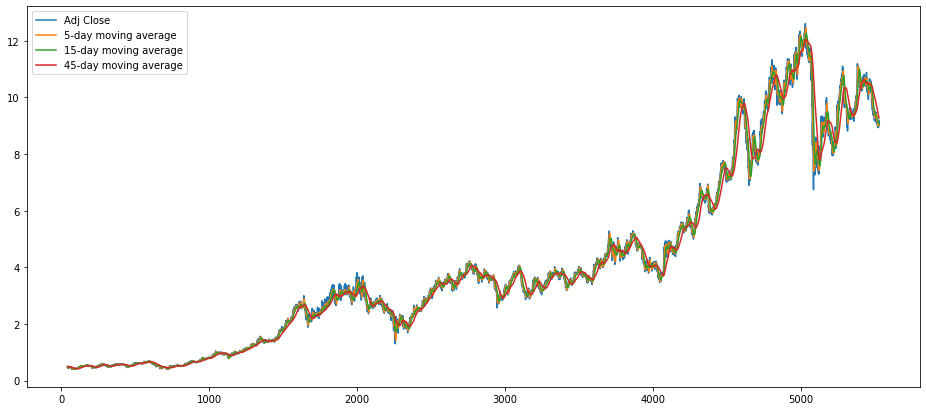

In [30]:
# gráfico de linha da série temporal
df_close2[['Adj Close', '5-day moving average', 
          '15-day moving average', '45-day moving average']].plot(secondary_y=data_ITAU, figsize=(16,7));

In [31]:
# dimensão da base de dados
df_ITAU.shape   # linhas e colunas

(5488, 10)

In [32]:
# separando a quantidade linhas de treino, validaçao e teste
linhas_df = df_ITAU.shape[0]

linhas_treino = round(linhas_df * 0.7)
linhas_validacao = round(linhas_df * 0.2)
linhas_teste = round(linhas_df * 0.1) - 1

print(
    'INFO:\n'
    f'- Linhas da base de dados: {linhas_df}',
    f'- Linhas de treino (70%) = {linhas_treino} | Índices = 0:{linhas_treino}', 
    f'- Linhas de validação (20%) =  {linhas_validacao} | Índices = {linhas_treino}:{linhas_treino + linhas_validacao}',
    f'- Linhas de teste (10%) = {linhas_teste} | Índices = {linhas_treino + linhas_validacao}:{linhas_df}',
    sep='\n'
)

INFO:
- Linhas da base de dados: 5488
- Linhas de treino (70%) = 3842 | Índices = 0:3842
- Linhas de validação (20%) =  1098 | Índices = 3842:4940
- Linhas de teste (10%) = 548 | Índices = 4940:5488


In [33]:
# instanciando a quantidade dos dados de treino, validação e teste
train_data = 3842
val_data = 1098
test_data = 548

print(
    f'Qtde de dados de treino: {train_data}', 
    f'Qtde de dados de validação: {val_data}', 
    f'Qtde de dados de treino: {test_data}',
    sep='\n')

print('Total geral:', train_data + val_data + test_data)

Qtde de dados de treino: 3842
Qtde de dados de validação: 1098
Qtde de dados de treino: 548
Total geral: 5488


In [35]:
# train_data = df_ITAU.iloc[0:linhas_treino]
# val_data = df_ITAU.iloc[3842:4940]
# test_data = df_ITAU.iloc[4940:5488]

# train_data.reset_index(drop=True, inplace=True)
# val_data.reset_index(drop=True, inplace=True)
# test_data.reset_index(drop=True, inplace=True)

# print('Dados para modelagem:' + str(train_data.shape))
# print('Dados para validação:' + str(val_data.shape))
# print('Dados para teste do modelo:' + str(test_data.shape))

In [36]:
# display(
#     train_data.head(),
#     val_data.head(),
#     test_data.head()
# )

In [34]:
# reindexando a base de dados
df_ITAU = df_ITAU.reset_index(drop=True)
df_ITAU

,Date,Open,High,Low,Close,Adj Close,Volume,5-day moving average,15-day moving average,45-day moving average
0,2000-03-03,0.855755,0.871315,0.850569,0.855755,0.461372,13140022,0.458017,0.470507,0.506112
1,2000-03-06,0.855755,0.855755,0.855755,0.855755,0.461372,0,0.457458,0.469575,0.503999
2,2000-03-07,0.855755,0.855755,0.855755,0.855755,0.450188,0,0.459136,0.469016,0.503067
3,2000-03-08,0.829823,0.840196,0.829823,0.835010,0.452984,6343495,0.458576,0.466779,0.500954
4,2000-03-09,0.845383,0.845383,0.835010,0.840196,0.447391,6912117,0.457458,0.464355,0.498717
...,...,...,...,...,...,...,...,...,...,...
5483,2021-12-30,9.040000,9.060000,8.900000,8.930000,9.020000,23322800,9.024000,9.083192,9.335062
5484,2022-01-03,9.020000,9.190000,8.920000,9.020000,9.090000,28542600,9.030000,9.071435,9.318435
5485,2022-01-04,9.030000,9.170000,8.970000,9.090000,9.000000,38831200,9.030000,9.063077,9.302327
5486,2022-01-05,9.050000,9.110000,8.920000,9.000000,9.070000,24574000,9.014000,9.057587,9.285255


In [35]:
# instanciando as variáveis explicativas (X) e a variável resposta (y)
X = df_ITAU.drop(['Date', 'Adj Close'], axis=1)
y = df_ITAU['Adj Close']

# tamanho das variáveis
len(X), len(y)

(5488, 5488)

In [36]:
# biblioteca para matemática
import numpy as np

# visualizando os 5 primeiros dados da variável X e y
print(
    f'\t\t++++++ [INFO] 5 amostras +++++\n'
    '\t\t==============================',
    f'Variáveis explicativas (X): \n{X.head()}', 
    f'Variável resposta (y): \n{np.array(y[:5])}',
    sep='\n\n' 
)

		++++++ [INFO] 5 amostras +++++

Variáveis explicativas (X): 
       Open      High  ...  15-day moving average  45-day moving average
0  0.855755  0.871315  ...               0.470507               0.506112
1  0.855755  0.855755  ...               0.469575               0.503999
2  0.855755  0.855755  ...               0.469016               0.503067
3  0.829823  0.840196  ...               0.466779               0.500954
4  0.845383  0.845383  ...               0.464355               0.498717

[5 rows x 8 columns]

Variável resposta (y): 
[0.46137226 0.46137226 0.45018789 0.45298445 0.44739148]


In [37]:
# função para escolher os melhores atributos
from sklearn.feature_selection import SelectKBest

# instanciando o objeto
k_best_feats = SelectKBest(k='all')

In [38]:
# criando uma lista com os atributos da variável explicativas
feats_list = list(X.columns)
print(feats_list)

['Open', 'High', 'Low', 'Close', 'Volume', '5-day moving average', '15-day moving average', '45-day moving average']


In [39]:
# treinando e transformando com o objeto os dados da variável explicativa
k_best_feats.fit_transform(X, y)

# instanciando as melhores métricas
k_best_feats_scores = k_best_feats.scores_

In [40]:
# concatenando os atributos e seus respectivos valores (peso de importância)
raw_pairs = zip(feats_list[1:], k_best_feats_scores)

# ordenando a lista de maior para o menor valores (peso de importância)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

In [41]:
# instanciando a lista com os pesos da importância dos atributos em um dicionário
k_best_feats_final = dict(ordered_pairs[:15])
best_feats = k_best_feats_final.keys()

# imprimindo os resultados
print(
    'Melhores atributos (features):\n'
    f'{k_best_feats_final}'
)

Melhores atributos (features):
{'15-day moving average': 2729.8945429396817, '45-day moving average': 1743.7274571284677, 'Volume': 1679.4899540356605, 'Low': 1505.186054419742, 'Close': 1487.3013181986069, 'High': 1202.668470013516, '5-day moving average': 4.305853571265882}


In [42]:
# nome das colunas
df_ITAU.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       '5-day moving average', '15-day moving average',
       '45-day moving average'],
      dtype='object')

In [43]:
# atributos com maior grau de importância
best_feats

dict_keys(['15-day moving average', '45-day moving average', 'Volume', 'Low', 'Close', 'High', '5-day moving average'])

In [44]:
# instanciando os atributos com maior importância
feats_importance = df_ITAU.drop(['Date', 'Open', 'Adj Close', 
                                 '5-day moving average'], axis=1)

# visualizando os atributos selecionados
feats_importance

,High,Low,Close,Volume,15-day moving average,45-day moving average
0,0.871315,0.850569,0.855755,13140022,0.470507,0.506112
1,0.855755,0.855755,0.855755,0,0.469575,0.503999
2,0.855755,0.855755,0.855755,0,0.469016,0.503067
3,0.840196,0.829823,0.835010,6343495,0.466779,0.500954
4,0.845383,0.835010,0.840196,6912117,0.464355,0.498717
...,...,...,...,...,...,...
5483,9.060000,8.900000,8.930000,23322800,9.083192,9.335062
5484,9.190000,8.920000,9.020000,28542600,9.071435,9.318435
5485,9.170000,8.970000,9.090000,38831200,9.063077,9.302327
5486,9.110000,8.920000,9.000000,24574000,9.057587,9.285255


In [45]:
# normalizando os dados de entradas da seleção dos atributos acima

# biblioteca para normalização dos dados
from sklearn.preprocessing import MinMaxScaler

# instanciando o objeto e realizando o treinamento da normalização dos dados da variável "feats_importance"
scaler = MinMaxScaler()
feats_scaled = scaler.fit_transform(feats_importance)

print(
    f'Dados normalizados: {feats_scaled.shape[0]} linhas e {feats_scaled.shape[1]} colunas.',
    feats_scaled,
    sep='\n\n'
)

Dados normalizados: 5488 linhas e 6 colunas.

[[0.01000959 0.0117989  0.01041623 0.08698448 0.00545298 0.00768877]
 [0.00880837 0.01220573 0.01041623 0.         0.00537441 0.0075071 ]
 [0.00880837 0.01220573 0.01041623 0.         0.00532726 0.00742695]
 ...
 [0.65065743 0.64874411 0.64647368 0.25705527 0.72980542 0.76406204]
 [0.64602547 0.64482174 0.63952158 0.16267528 0.7293426  0.76259406]
 [0.64834149 0.64639064 0.64492873 0.168036   0.72887963 0.76165205]]


In [46]:
# quantidade de dados da variável "feats_scaled"
len(feats_scaled)

5488

In [47]:
# instanciando os dados de treino e validação 
X_train = feats_scaled[0:3842]
X_val = feats_scaled[3842:4940]

y_train = y[0:3842]
y_val = y[3842:4940]

print(
    '\tDados',
    '\n++++++++++++++++++++'
    '\n             X | y'
    '\nTreino   :', len(X_train), len(y_train), 
    '\nValidação:', len(X_val), len(y_val)
)

	Dados 
++++++++++++++++++++
             X | y
Treino   : 3842 3842 
Validação: 1098 1098


In [48]:
print(
    '5 amostras dos dados de treino',
    f'X: \n{X_train[:5]}',
    f'y: \n{y_train[:5]}',
    sep='\n\n'
)

5 amostras dos dados de treino

X: 
[[0.01000959 0.0117989  0.01041623 0.08698448 0.00545298 0.00768877]
 [0.00880837 0.01220573 0.01041623 0.         0.00537441 0.0075071 ]
 [0.00880837 0.01220573 0.01041623 0.         0.00532726 0.00742695]
 [0.00760724 0.01017144 0.00881378 0.04199275 0.00513868 0.00724529]
 [0.00800767 0.01057834 0.00921437 0.04575692 0.00493439 0.00705294]]

y: 
0    0.461372
1    0.461372
2    0.450188
3    0.452984
4    0.447391
Name: Adj Close, dtype: float64


In [49]:
print(
    '5 amostras dos dados de validação',
    f'X: \n{X_val[:5]}',
    f'y: \n{y_val[:5]}',
    sep='\n\n'
)

5 amostras dos dados de validação

X: 
[[0.49748157 0.49528618 0.49394885 0.15882279 0.39178142 0.39841435]
 [0.49204886 0.49099237 0.48488893 0.14487316 0.38977232 0.39815018]
 [0.4980852  0.49099237 0.49817682 0.2575234  0.38872278 0.3981474 ]
 [0.49506705 0.49773967 0.49515685 0.23205222 0.38734338 0.39810291]
 [0.49385979 0.48547189 0.47703699 0.23694734 0.38467454 0.39777108]]

y: 
3842    4.775482
3843    4.892868
3844    4.866189
3845    4.706116
3846    4.708790
Name: Adj Close, dtype: float64


In [50]:
# função de regressão linear
from sklearn.linear_model import LinearRegression

# instanciando o modelo
l_reg = LinearRegression()

# realizando o treinamento e a predição com o modelo instanciado
l_reg.fit(X_train, y_train)
pred = l_reg.predict(X_val)

# função de avaliação do modelo
from sklearn.metrics import r2_score

# aplicando a função nos dados de avaliação (y_val) e nas predições (pred)
eval_model = r2_score(y_val, pred)

# visualizando o resultado
print(
    'Modelo de Regressão Linear',
    f'\nCoeficiente de determinação: {eval_model * 100:.2f}%'
)

Modelo de Regressão Linear 
Coeficiente de determinação: 96.78%


In [51]:
# função de rede neural
from sklearn.neural_network import MLPRegressor

# instanciando o modelo
mlp_reg = MLPRegressor(max_iter=2_000)

# realizando o treinamento e a predição com o modelo instanciado
mlp_reg.fit(X_train, y_train)
pred = mlp_reg.predict(X_val)

# função de avaliação do modelo
from sklearn.metrics import r2_score

# aplicando a função nos dados de avaliação (y_val) e nas predições (pred)
eval_model = r2_score(y_val, pred)

# visualizando o resultado
print(
    'Modelo de Rede Neural Simples',
    f'\nCoeficiente de determinação: {eval_model * 100:.2f}%'
)

Modelo de Rede Neural Simples 
Coeficiente de determinação: 52.81%


In [52]:
# instanciando um dicionário com hiperparâmetros
params = {
    'hidden_layer_sizes': [(i, ) for i in list(range(1, 21))],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'], 
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}

# visualizando os dados do dicionário instanciado
params

{'activation': ['tanh', 'relu'],
 'alpha': [0.0001, 0.05],
 'hidden_layer_sizes': [(1,),
  (2,),
  (3,),
  (4,),
  (5,),
  (6,),
  (7,),
  (8,),
  (9,),
  (10,),
  (11,),
  (12,),
  (13,),
  (14,),
  (15,),
  (16,),
  (17,),
  (18,),
  (19,),
  (20,)],
 'learning_rate': ['constant', 'adaptive'],
 'solver': ['lbfgs', 'sgd', 'adam']}

In [54]:
# função de rede neural
from sklearn.neural_network import MLPRegressor

# instanciando o modelo com 2.000 iterações
mlp_reg = MLPRegressor(max_iter=2_000)

# função de procura dos melhores hiperparâmetros
from sklearn.model_selection import GridSearchCV

# instanciando o objeto "search" e aplicando a função "GridSearchCV" com os seguintes argumentos:
# modelo instanciado, dicionário de parâmetros, número de núcleos , validação cruzada
search = GridSearchCV(mlp_reg, params, n_jobs=-1, cv=5)

# visualizando o objeto com seus parâmetros
search

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                (6,), (7,), (8,), (9,), (10,),
                                                (11,), (12,), (13,), (14,),
                                                (15,), (16,), (17,), (18,),
                                                (19,), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [55]:
# realizando o treinamento do obejto "search" com os dados de treino (X_train, y_train)
search.fit(X_train, y_train)

# instanciando os melhores parâmetros
clf = search.best_estimator_
print(clf)  # visualizando o resultado dos melhores parâmetros

# realizando a predição com os dados de validação (X_val)
pred = search.predict(X_val)

# realizando avalição do modelo com os dados de validação (X_val, y_val)
eval_model = search.score(X_val, y_val)

# visualizando o resultado
print(
    '\nModelo de Rede Neural Complexa',
    f'\nCoeficiente de determinação: {eval_model * 100:.2f}%'
)

MLPRegressor(activation='tanh', hidden_layer_sizes=(7,),
             learning_rate='adaptive', max_iter=2000, solver='lbfgs')

Modelo de Rede Neural Complexa 
Coeficiente de determinação: 51.67%


In [56]:
# utilizando o modelo que apresentou melhor coeficiente de determinação nos dados de teste
previsao = feats_scaled[4940:5488]

data_pregao_full = df_ITAU['Date']
data_pregao = data_pregao_full[4940:5488]

resp_full = df_ITAU['Adj Close']
resp = resp_full[4940:5488]

# função de regressão linear
from sklearn.linear_model import LinearRegression

# instanciando o modelo
model = LinearRegression()

# model = MLPRegressor(activation='tanh', alpha=0.05, hidden_layer_sizes=(4,), 
#                      learning_rate='adaptive', max_iter=2000, solver='lbfgs')

model.fit(X_train, y_train)

print(
    '\tScore',
    f'Dados de treino: {model.score(X_train, y_train):.4f}',
    f'Dados de validação: {model.score(X_val, y_val):.4f}\n',
    sep='\n'
    )

pred_final = model.predict(previsao)

import pandas as pd

df = pd.DataFrame({
    'Date': data_pregao,
    'real': resp,
    'previsao': pred_final
})

df['real'] = df['real'].shift(+1)

df.set_index('Date', inplace=True)
df.round(4)

	Score
Dados de treino: 0.9937
Dados de validação: 0.9678



,real,previsao
Date,,
2019-10-17,NaN,10.6301
2019-10-18,11.4588,10.6173
2019-10-21,11.6254,10.6763
2019-10-22,11.8884,10.7384
2019-10-23,11.9761,10.7692
...,...,...
2021-12-30,8.9300,8.4372
2022-01-03,9.0200,8.4166
2022-01-04,9.0900,8.4652


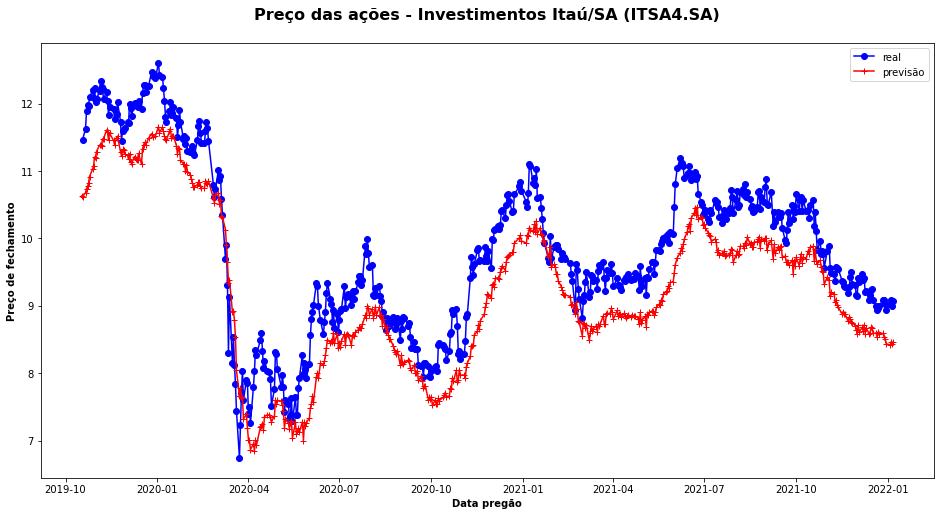

In [57]:
# gráfico dos dados reais e preditos
plt.figure(figsize=(16,8))

plt.title('Preço das ações - Investimentos Itaú/SA (ITSA4.SA)\n', 
          {'fontsize': 16,'fontweight': 'bold'})

plt.plot(df['real'], label='real', color='blue', marker='o')
plt.plot(df['previsao'], label='previsão', color='red', marker='+')

plt.xlabel('Data pregão', {'fontsize': 10,'fontweight': 'bold'})
plt.ylabel('Preço de fechamento', {'fontsize': 10,'fontweight': 'bold'})
plt.legend();

In [58]:
# criando uma cópia do dataframe e instanciando no objeto "df2"
df2 = df.copy()
df2

,real,previsao
Date,,
2019-10-17,NaN,10.630064
2019-10-18,11.458840,10.617316
2019-10-21,11.625418,10.676252
2019-10-22,11.888433,10.738351
2019-10-23,11.976109,10.769153
...,...,...
2021-12-30,8.930000,8.437180
2022-01-03,9.020000,8.416561
2022-01-04,9.090000,8.465197


In [59]:
# resetando o índice
df2.reset_index(inplace=True)
df2

,Date,real,previsao
0,2019-10-17,NaN,10.630064
1,2019-10-18,11.458840,10.617316
2,2019-10-21,11.625418,10.676252
3,2019-10-22,11.888433,10.738351
4,2019-10-23,11.976109,10.769153
...,...,...,...
543,2021-12-30,8.930000,8.437180
544,2022-01-03,9.020000,8.416561
545,2022-01-04,9.090000,8.465197
546,2022-01-05,9.000000,8.436529


In [60]:
# instanciando o recorte de tempo no df3
df3 = df2.loc['2020':] # de 2020 em diante
df3

,Date,real,previsao
203,2020-08-13,8.846345,8.696069
204,2020-08-14,8.909148,8.804937
205,2020-08-17,8.639989,8.614639
206,2020-08-18,8.810812,8.684719
207,2020-08-19,8.747880,8.559860
...,...,...,...
543,2021-12-30,8.930000,8.437180
544,2022-01-03,9.020000,8.416561
545,2022-01-04,9.090000,8.465197
546,2022-01-05,9.000000,8.436529


In [61]:
# visualizando o tipo de dados dos atributos
df3.dtypes

Date        datetime64[ns]
real               float64
previsao           float64
dtype: object

In [63]:
# resetando o índice
df3 = df3.set_index(pd.DatetimeIndex(
    df3['Date'].values
))

# visualizando
df3.head()

,Date,real,previsao
2020-08-13,2020-08-13,8.846345,8.696069
2020-08-14,2020-08-14,8.909148,8.804937
2020-08-17,2020-08-17,8.639989,8.614639
2020-08-18,2020-08-18,8.810812,8.684719
2020-08-19,2020-08-19,8.747880,8.559860


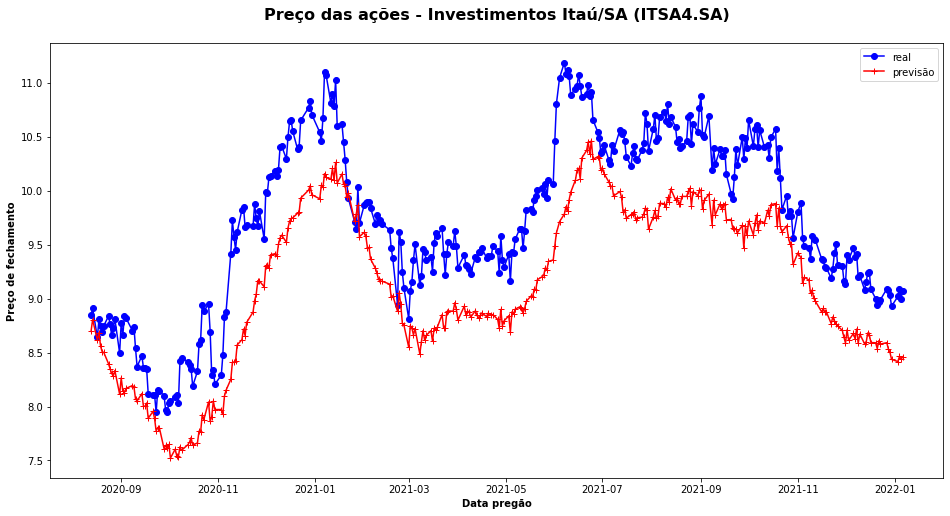

In [64]:
# plotando o gráfico do recorte da série temporal
plt.figure(figsize=(16,8))

plt.title('Preço das ações - Investimentos Itaú/SA (ITSA4.SA)\n', 
          {'fontsize': 16,'fontweight': 'bold'})

plt.plot(df3['real'], label='real', color='blue', marker='o')
plt.plot(df3['previsao'], label='previsão', color='red', marker='+')

plt.xlabel('Data pregão', {'fontsize': 10,'fontweight': 'bold'})
plt.ylabel('Preço de fechamento', {'fontsize': 10,'fontweight': 'bold'})
plt.legend();